Laboratiorum 02 - Metoda najmniejszych kwadratów

In [2]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")

In [3]:
labels = []
labels_file = open("breast-cancer.labels")
for line in labels_file:
    labels.append(line.replace("\n", ""))
print(labels)

train = pd.read_csv("breast-cancer-train.dat", header=None, names=labels)
validate = pd.read_csv("breast-cancer-validate.dat", header=None, names=labels)


malignant = train[train["Malignant/Benign"] == "M"]
display(malignant)
benign = train[train["Malignant/Benign"] == "B"]
display(benign)


['patient ID', 'Malignant/Benign', 'radius (mean)', 'texture (mean)', 'perimeter (mean)', 'area (mean)', 'smoothness (mean)', 'compactness (mean)', 'concavity (mean)', 'concave points (mean)', 'symmetry (mean)', 'fractal dimension (mean)', 'radius (stderr)', 'texture (stderr)', 'perimeter (stderr)', 'area (stderr)', 'smoothness (stderr)', 'compactness (stderr)', 'concavity (stderr)', 'concave points (stderr)', 'symmetry (stderr)', 'fractal dimension (stderr)', 'radius (worst)', 'texture (worst)', 'perimeter (worst)', 'area (worst)', 'smoothness (worst)', 'compactness (worst)', 'concavity (worst)', 'concave points (worst)', 'symmetry (worst)', 'fractal dimension (worst)']


,patient ID,Malignant/Benign,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),...,radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,8911670,M,18.81,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,...,19.96,24.30,129.00,1236.0,0.1243,0.11600,0.2210,0.1294,0.2567,0.05737
280,8912049,M,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,...,23.72,35.90,159.80,1724.0,0.1782,0.38410,0.5754,0.1872,0.3258,0.09720
282,89122,M,19.40,18.18,127.20,1145.0,0.10370,0.14420,0.16260,0.09464,...,23.79,28.65,152.40,1628.0,0.1518,0.37490,0.4316,0.2252,0.3590,0.07787
283,8912280,M,16.24,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,...,18.55,25.09,126.90,1031.0,0.1365,0.47060,0.5026,0.1732,0.2770,0.10630


,patient ID,Malignant/Benign,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),...,radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,891716,B,12.720,13.78,81.78,492.1,0.09667,0.08393,0.01288,0.019240,...,13.500,17.48,88.54,553.7,0.12980,0.14720,0.05233,0.06343,0.2369,0.06922
295,891923,B,13.770,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.019170,...,14.670,16.93,94.17,661.1,0.11700,0.10720,0.03732,0.05802,0.2823,0.06794
296,891936,B,10.910,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.013690,...,11.370,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643
298,892214,B,14.260,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.013740,...,16.220,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676


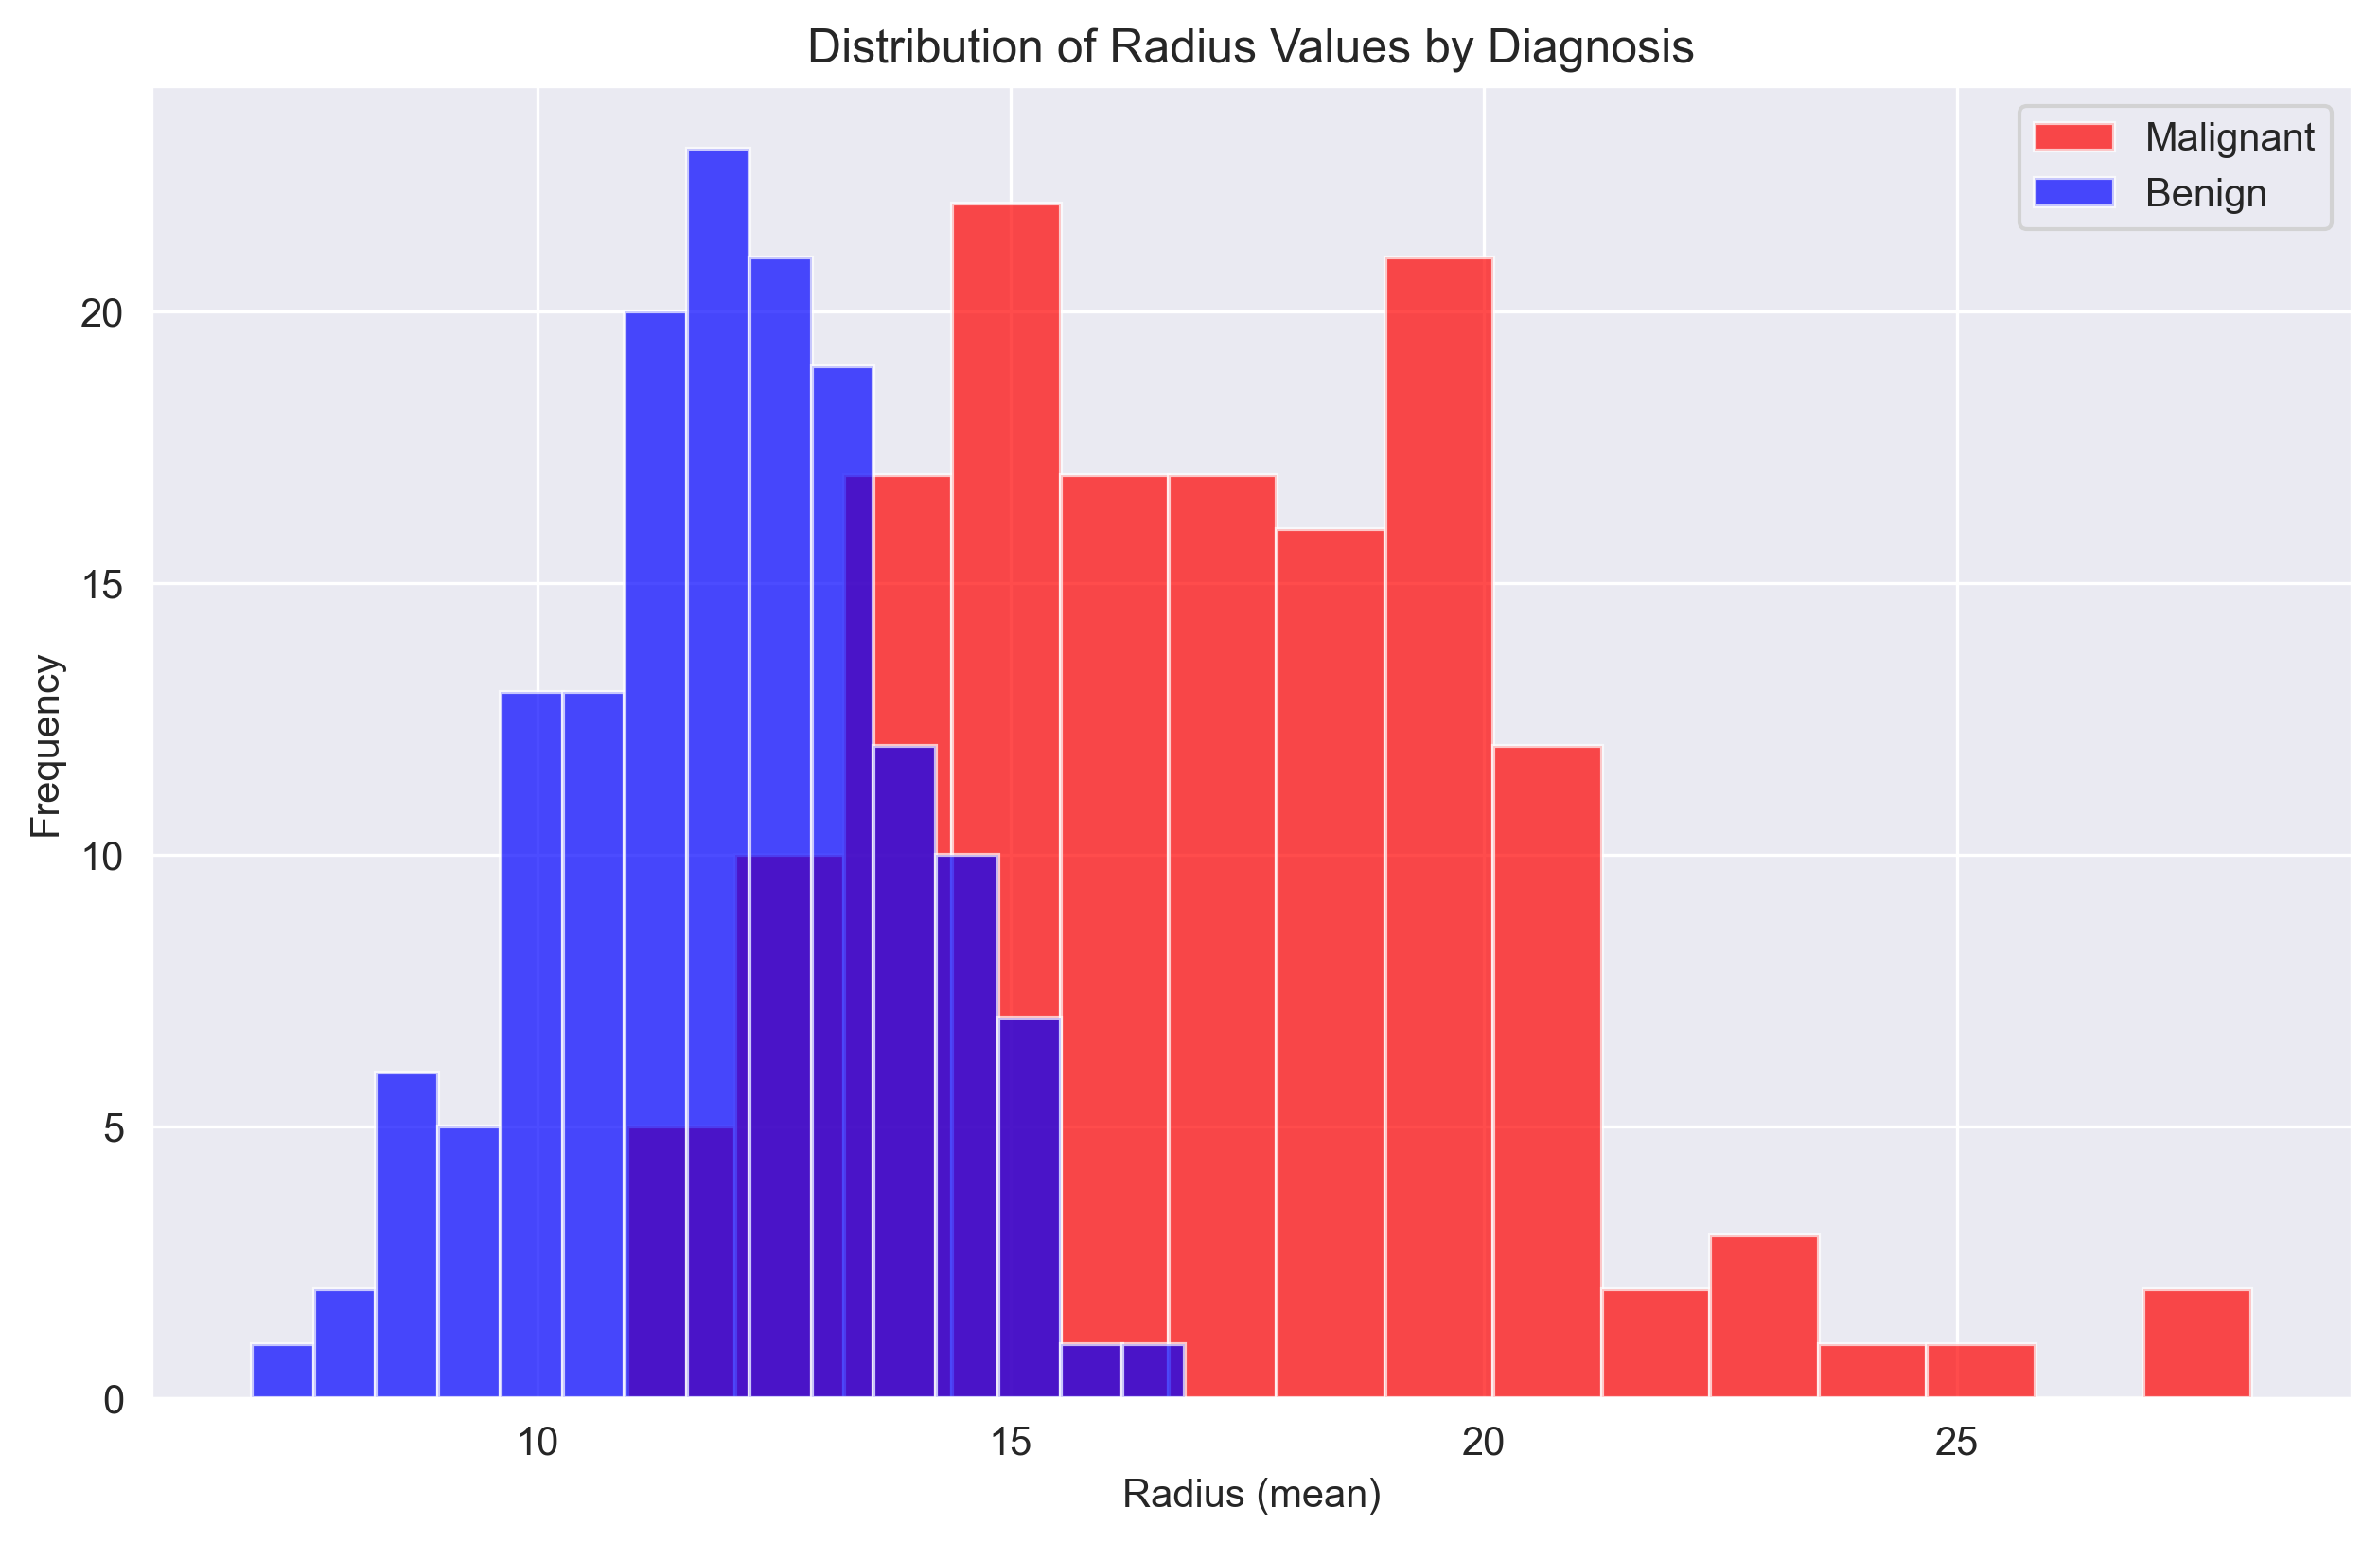

In [4]:
plt.figure(dpi=300, figsize=(10, 6))
plt.hist(malignant["radius (mean)"], bins=15, alpha=0.7, color="red", label="Malignant")
plt.hist(benign["radius (mean)"], bins=15, alpha=0.7, color="blue", label="Benign")
plt.xlabel("Radius (mean)")
plt.ylabel("Frequency")
plt.title("Distribution of Radius Values by Diagnosis")
plt.legend()
plt.show()


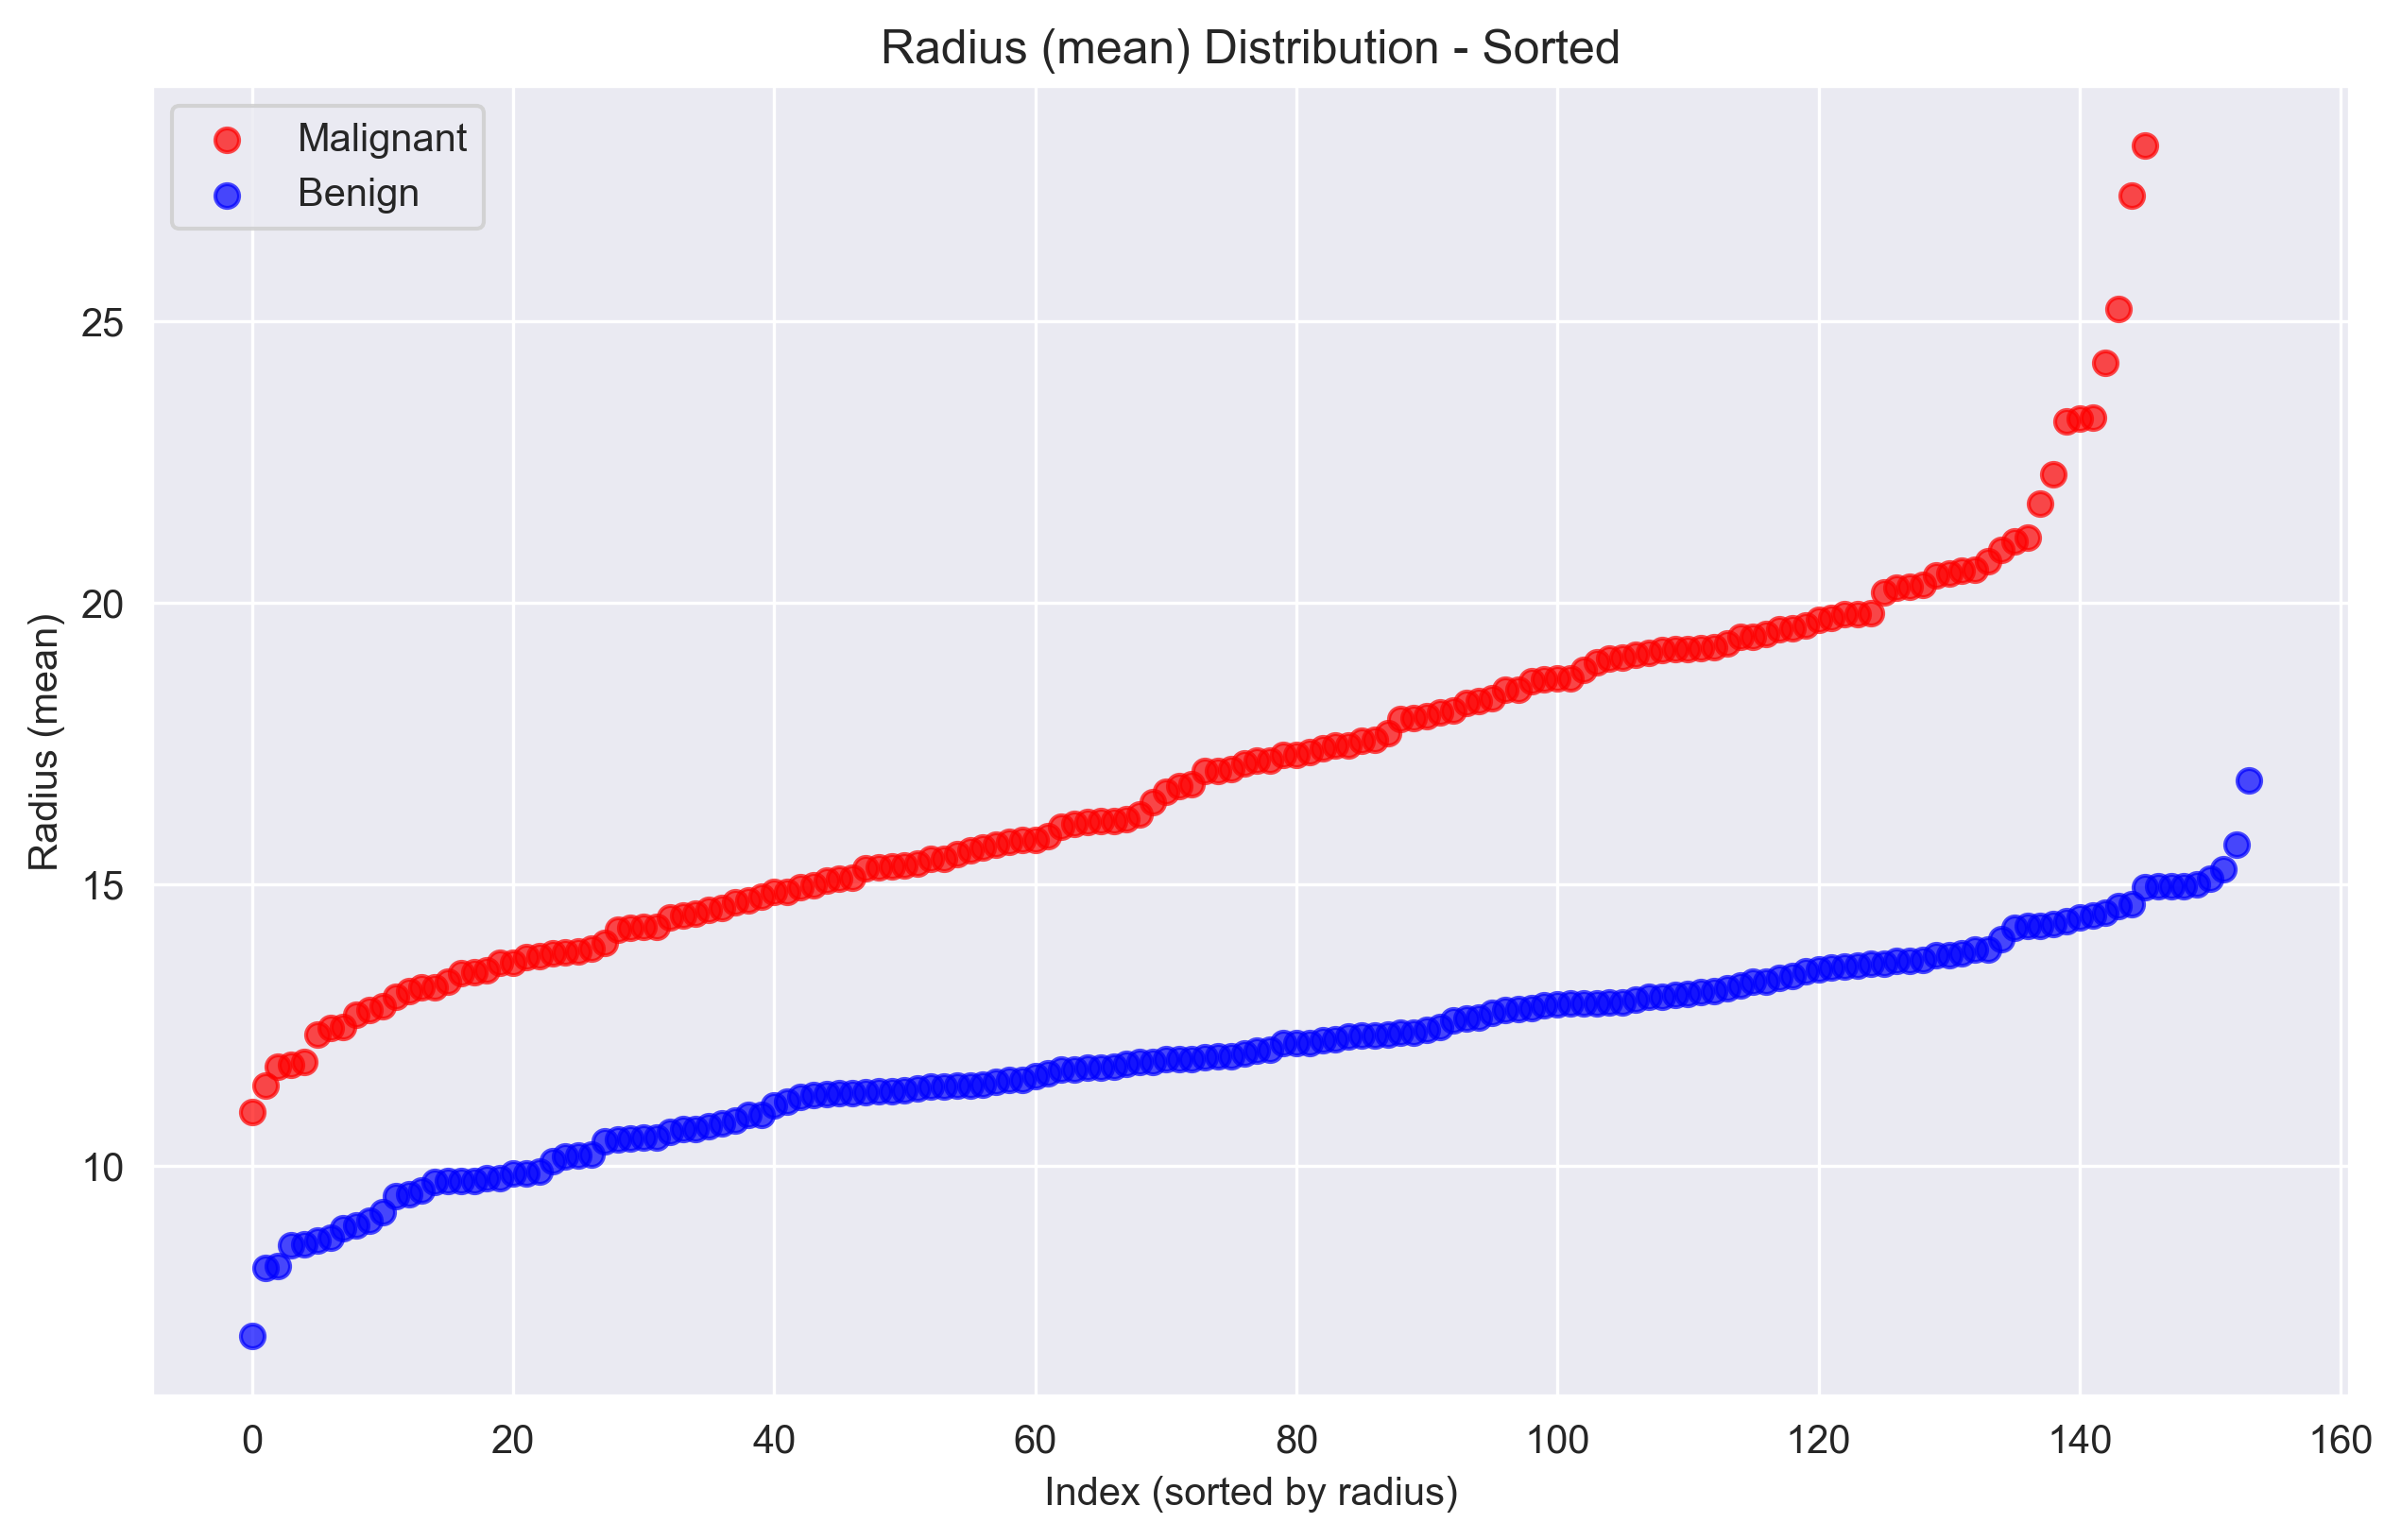

In [5]:
malignant_sorted = malignant.sort_values(by="radius (mean)").reset_index(drop=True)
benign_sorted = benign.sort_values(by="radius (mean)").reset_index(drop=True)

plt.figure(dpi=300, figsize=(10, 6))


x_malignant = np.arange(len(malignant_sorted))
x_benign = np.arange(len(benign_sorted))


plt.scatter(
    x_malignant,
    malignant_sorted["radius (mean)"],
    color="red",
    label="Malignant",
    alpha=0.7,
)
plt.scatter(
    x_benign, benign_sorted["radius (mean)"], color="blue", label="Benign", alpha=0.7
)

plt.xlabel("Index (sorted by radius)")
plt.ylabel("Radius (mean)")
plt.title("Radius (mean) Distribution - Sorted")
plt.legend()
plt.show()